<a href="https://colab.research.google.com/github/thisishasan/slda/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
pip install nbconvert

In [99]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [100]:
!wget -nc 'https://raw.githubusercontent.com/thisishasan/slda/refs/heads/main/dataset.csv'

File ‘dataset.csv’ already there; not retrieving.



In [101]:
file_path = os.path.join('dataset.csv')
df = pd.read_csv(file_path)

In [102]:
df.rename(columns = {
    'Battery Electric Vehicles (BEVs)' : "Electric Vehicles",
    'Plug-In Hybrid Electric Vehicles (PHEVs)': 'Hybrid Electric Vehicles',
    'Non-Electric Vehicle Total': 'Non Electric Vehicles'}, inplace=True)
df.head()

,Date,County,State,Vehicle Primary Use,Electric Vehicles,Hybrid Electric Vehicles,Electric Vehicle (EV) Total,Non Electric Vehicles,Total Vehicles,Percent Electric Vehicles
0,August 31 2022,Spartanburg,SC,Passenger,0,1,1,36,37,2.70
1,December 31 2019,Adams,WA,Truck,0,0,0,5196,5196,0.00
2,March 31 2020,Chatham,NC,Passenger,1,0,1,6,7,14.29
3,February 28 2023,Howard,MD,Passenger,0,2,2,64,66,3.03
4,August 31 2024,Northampton,PA,Passenger,1,0,1,14,15,6.67


In [103]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.sort_values(by=['Month'], inplace=True)
df.head()

,Date,County,State,Vehicle Primary Use,Electric Vehicles,Hybrid Electric Vehicles,Electric Vehicle (EV) Total,Non Electric Vehicles,Total Vehicles,Percent Electric Vehicles,Month,Year
19908,2024-01-31,Kittitas,WA,Passenger,486,121,607,29425,30032,2.02,1,2024
20976,2020-01-31,Fairfax,VA,Passenger,5,1,6,770,776,0.77,1,2020
6071,2024-01-31,Skamania,WA,Passenger,140,54,194,7972,8166,2.38,1,2024
20966,2019-01-31,Grays Harbor,WA,Passenger,67,75,142,47438,47580,0.30,1,2019
6076,2020-01-31,Boone,MO,Passenger,0,1,1,11,12,8.33,1,2020


In [104]:
df_2022 = df[df['Date'].dt.year == 2022]
df_2022.head()

,Date,County,State,Vehicle Primary Use,Electric Vehicles,Hybrid Electric Vehicles,Electric Vehicle (EV) Total,Non Electric Vehicles,Total Vehicles,Percent Electric Vehicles,Month,Year
6179,2022-01-31,Yellowstone,MT,Passenger,0,1,1,35,36,2.78,1,2022
6183,2022-01-31,Fort Bend,TX,Passenger,1,0,1,33,34,2.94,1,2022
6190,2022-01-31,Maricopa,AZ,Passenger,14,5,19,1288,1307,1.45,1,2022
20918,2022-01-31,San Joaquin,CA,Passenger,1,1,2,106,108,1.85,1,2022
21078,2022-01-31,Honolulu,HI,Passenger,4,5,9,423,432,2.08,1,2022


In [105]:
df_2023 = df[df['Date'].dt.year == 2023]
df_2023.head()

,Date,County,State,Vehicle Primary Use,Electric Vehicles,Hybrid Electric Vehicles,Electric Vehicle (EV) Total,Non Electric Vehicles,Total Vehicles,Percent Electric Vehicles,Month,Year
6124,2023-01-31,New Haven,CT,Passenger,0,2,2,27,29,6.90,1,2023
20919,2023-01-31,Williamson,TX,Passenger,0,2,2,82,84,2.38,1,2023
6175,2023-01-31,Columbia,WA,Truck,0,0,0,1569,1569,0.00,1,2023
6206,2023-01-31,Larimer,CO,Passenger,1,0,1,42,43,2.33,1,2023
6066,2023-01-31,Lee,AL,Passenger,1,0,1,18,19,5.26,1,2023


In [106]:
df_2024 = df[df['Date'].dt.year == 2024]
df_2024.head()

,Date,County,State,Vehicle Primary Use,Electric Vehicles,Hybrid Electric Vehicles,Electric Vehicle (EV) Total,Non Electric Vehicles,Total Vehicles,Percent Electric Vehicles,Month,Year
19908,2024-01-31,Kittitas,WA,Passenger,486,121,607,29425,30032,2.02,1,2024
6071,2024-01-31,Skamania,WA,Passenger,140,54,194,7972,8166,2.38,1,2024
20960,2024-01-31,Douglas,CO,Passenger,0,2,2,54,56,3.57,1,2024
20951,2024-01-31,Galveston,TX,Passenger,1,1,2,18,20,10.00,1,2024
6158,2024-01-31,Collin,TX,Passenger,4,0,4,48,52,7.69,1,2024


In [107]:
grouped_by_month_2022 = df_2022.groupby('Month')[
    ['Electric Vehicles', 'Hybrid Electric Vehicles', 'Non Electric Vehicles']
].sum().reset_index()

grouped_by_month_2022.head()

grouped_by_month_2023 = df_2023.groupby('Month')[
    ['Electric Vehicles', 'Hybrid Electric Vehicles', 'Non Electric Vehicles']
].sum().reset_index()

grouped_by_month_2023.head()

grouped_by_month_2024 = df_2024.groupby('Month')[
    ['Electric Vehicles', 'Hybrid Electric Vehicles', 'Non Electric Vehicles']
].sum().reset_index()

grouped_by_month_2024.head()

,Month,Electric Vehicles,Hybrid Electric Vehicles,Non Electric Vehicles
0,1,135182,37949,5993148
1,2,138736,38787,5981782
2,3,141365,39624,5978526
3,4,145115,40594,5985050
4,5,148577,41314,5980475


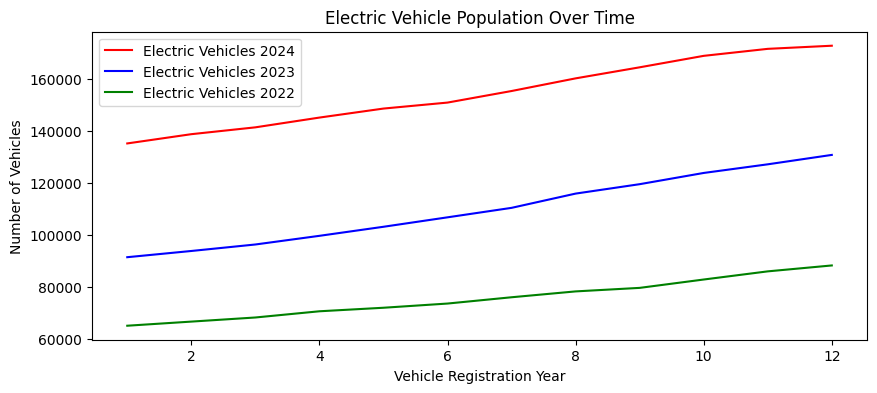

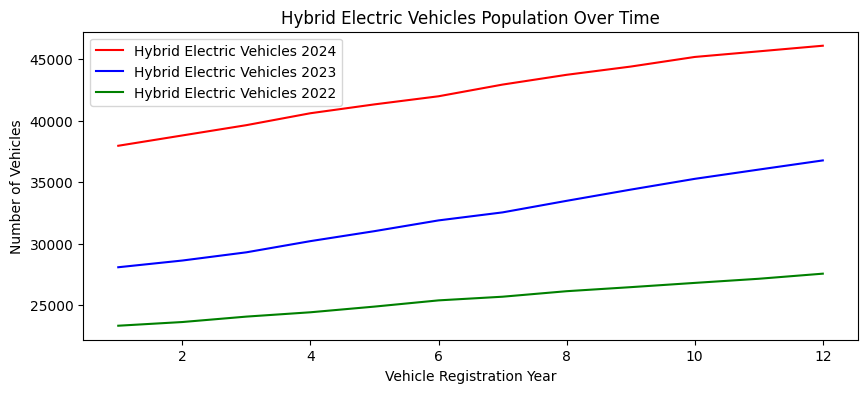

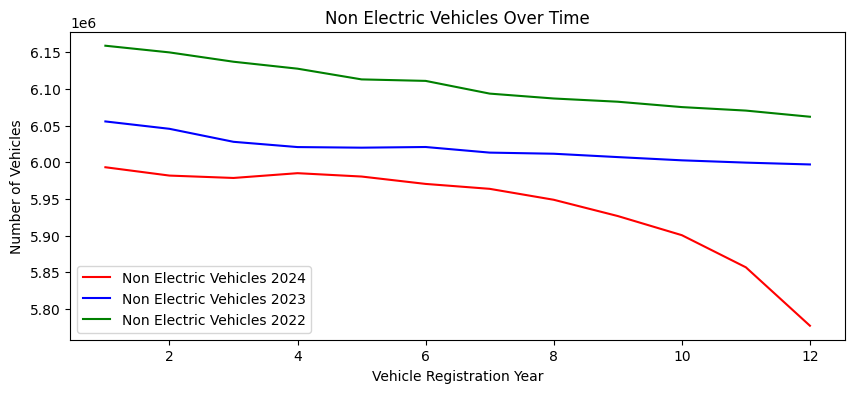

In [108]:
plt.figure(figsize=(10,4), dpi = 100)
plt.plot(grouped_by_month_2024['Month'], grouped_by_month_2024['Electric Vehicles'], '-r', label='Electric Vehicles 2024')
plt.plot(grouped_by_month_2023['Month'], grouped_by_month_2023['Electric Vehicles'], '-b', label='Electric Vehicles 2023')
plt.plot(grouped_by_month_2022['Month'], grouped_by_month_2022['Electric Vehicles'], '-g', label='Electric Vehicles 2022')
plt.xlabel('Vehicle Registration Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.title('Electric Vehicle Population Over Time')
plt.show()

plt.figure(figsize=(10,4), dpi = 100)
plt.plot(grouped_by_month_2024['Month'], grouped_by_month_2024['Hybrid Electric Vehicles'], '-r', label='Hybrid Electric Vehicles 2024')
plt.plot(grouped_by_month_2023['Month'], grouped_by_month_2023['Hybrid Electric Vehicles'], '-b', label='Hybrid Electric Vehicles 2023')
plt.plot(grouped_by_month_2022['Month'], grouped_by_month_2022['Hybrid Electric Vehicles'], '-g', label='Hybrid Electric Vehicles 2022')
plt.xlabel('Vehicle Registration Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.title('Hybrid Electric Vehicles Population Over Time')
plt.show()

plt.figure(figsize=(10,4), dpi = 100)
plt.plot(grouped_by_month_2024['Month'], grouped_by_month_2024['Non Electric Vehicles'], '-r', label='Non Electric Vehicles 2024')
plt.plot(grouped_by_month_2023['Month'], grouped_by_month_2023['Non Electric Vehicles'], '-b', label='Non Electric Vehicles 2023')
plt.plot(grouped_by_month_2022['Month'], grouped_by_month_2022['Non Electric Vehicles'], '-g', label='Non Electric Vehicles 2022')
plt.xlabel('Vehicle Registration Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.title('Non Electric Vehicles Over Time')
plt.show()